In [1]:
#sentiment analysis
#Phoebe S.
#march 24,2022

#imports 
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes 

import pylab as pl
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix


from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer #root words#Lemmatization reduces words to their base word
lem = WordNetLemmatizer()


In [2]:
#read files #split text into good or bad meaning

def readFile(file_name):#read files for it
        file = open(file_name, "r") 
        words = file.read().splitlines() 
        file.close()
        return words
    

badWords= readFile("bad.txt")
print (badWords)

goodWords= readFile("good.txt")
print (goodWords)

#neutralWords = ["nice", "comfortable", "cozy","elegant", "impress","like","attractive","okay","ok", "fine", "fair","alright"]
expressionWords =["!","super", "lot","too","very","really"] #eg !,too: #if this is in sentence ->make it more bad/good 
negateWords = ["no","not","don't","won't","but","didn't"] #"not" - check if negate sentence# not-negate sentecne #check if word before = "not"-> increase other counter


['bad', 'deceive', 'flaw', 'disappoint', 'bore', 'huge', 'large', 'big', 'poor', 'awful', 'terrible', 'delicate', 'scratch', 'itch', 'itchy', 'expensive', 'sad', 'ugly', 'aggravate', 'anger', 'annoy', 'awful', 'awkward', 'bother', 'break', 'bug', 'burden', 'challenge', 'chaos', 'complain', 'concen', 'conflict', 'confuse', 'con', 'costly', 'crazy', 'degrade', 'deprive', 'desperate', 'deteriorate', 'detest', 'Hate', 'disagree', 'disapprove', 'disaster', 'discouraging', 'disdain', 'disgust', 'disgrace', 'dishonest', 'dislike', 'disregard', 'disrespect', 'distasteful', 'distraught', 'doubt', 'dull', 'error', 'excuse', 'excessive', 'exhaust', 'expire', 'fail', 'fake', 'fall', 'frustrate', 'greed', 'grieve', 'gross', 'hard', 'harsh', 'harm', 'hate', 'horrid', 'horrible', 'hostile', 'hurt', 'impatient', 'impossible', 'inadequate', 'inaccurate', 'inconsistent', 'inconvenience', 'incorrect', 'ineffective', 'insane', 'insignificant', 'insult', 'intense', 'intolerable', 'irresponsible', 'liar', '

In [3]:
#Load the original data
sentiment_df= pd.read_csv("Womens Clothing E-Commerce Reviews.csv",delimiter = ",")
df = sentiment_df #copy 

print(sentiment_df.head())
#print(df.head())


   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

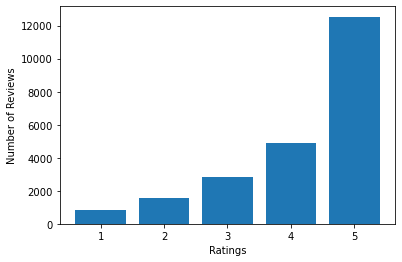

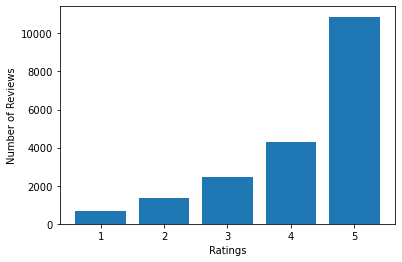

In [4]:
#graphs - showing distriubtions of Ratings based on dif text features #showing the unbalanced reviews

Sentiment_count=df.groupby('Rating').count()

plt.bar(Sentiment_count.index.values,  Sentiment_count['Review Text'])
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.show()


plt.bar(Sentiment_count.index.values,  Sentiment_count['Title'])
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.show()


In [5]:
# sentiment classify -text and title

sentiment_df["Title"] =sentiment_df["Title"].fillna(0)#replace nan with 0 
sentiment_df["Review Text"] =sentiment_df["Review Text"].fillna(0)

sentiment_df_title=sentiment_df["Title"]
sentiment_df_text=sentiment_df["Review Text"]


print(sentiment_df_title.head())
print()
print(sentiment_df_text.head())

0                          0
1                          0
2    Some major design flaws
3           My favorite buy!
4           Flattering shirt
Name: Title, dtype: object

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
Name: Review Text, dtype: object


In [6]:
#title
title_evals= []


for i in range(len(sentiment_df_title)):#for each sentence 
    num_good_words = 0 
    num_bad_words = 0
    
    final_eval = 0

    was_negated = False  
    was_expression = False

   
    if (sentiment_df_title.values[i]!=0):#not na

        sentence = sentiment_df_title.values[i]
        
        if i < 15: #print first few
            print(sentence)#debug
        words=word_tokenize(sentence)

        for j in range(len(words)): #for each word 

            word = words[j].lower()
            rootWord = lem.lemmatize(word,"v") #root words 
            
            #meaning of word
            if rootWord in goodWords :
                num_good_words+=1

            elif rootWord  in badWords:
                num_bad_words+=1



            elif rootWord in negateWords:
                was_negated = True
            elif rootWord in expressionWords:
                was_expression = True


    #calc final eval
    final_eval = num_good_words-num_bad_words

    #check for negation or expresion
    #if a word in negationWords: ->increase other counter
    #if a word in expressionWords: ->increase the counter more?
    
    if(was_negated):
        final_eval = -final_eval

    if(was_expression):
        final_eval = final_eval*2#*5#*10 #nomralize them after?

    if i < 15: #print first few

        print("was_negated, was_expression = ",was_negated,was_expression)
        print("num_good_words, num_bad_words = ",num_good_words, num_bad_words  )#debug
        print("final_eval =",final_eval,"\n"  )
    
    
    #put final eval in list or somthing to add to descript features    
    title_evals.append(final_eval)



was_negated, was_expression =  False False
num_good_words, num_bad_words =  0 0
final_eval = 0 

was_negated, was_expression =  False False
num_good_words, num_bad_words =  0 0
final_eval = 0 

Some major design flaws
was_negated, was_expression =  False False
num_good_words, num_bad_words =  0 1
final_eval = -1 

My favorite buy!
was_negated, was_expression =  False True
num_good_words, num_bad_words =  1 0
final_eval = 2 

Flattering shirt
was_negated, was_expression =  False False
num_good_words, num_bad_words =  1 0
final_eval = 1 

Not for the very petite
was_negated, was_expression =  True True
num_good_words, num_bad_words =  0 0
final_eval = 0 

Cagrcoal shimmer fun
was_negated, was_expression =  False False
num_good_words, num_bad_words =  1 0
final_eval = 1 

Shimmer, surprisingly goes with lots
was_negated, was_expression =  False True
num_good_words, num_bad_words =  0 0
final_eval = 0 

Flattering
was_negated, was_expression =  False False
num_good_words, num_bad_words =  

In [7]:
#text
text_evals= []


for i in range(len(sentiment_df_text)):#for each sentence 
    num_good_words = 0 
    num_bad_words = 0
    
    final_eval = 0

    was_negated = False  
    was_expression = False
    
    if (sentiment_df_text.values[i]!=0):#not na
       
        sentence = sentiment_df_text.values[i]
        words=word_tokenize(sentence)

        for j in range(len(words)): #for each word 


            word = words[j].lower()
            rootWord = lem.lemmatize(word,"v") #root words

            #meaning of word
            if rootWord in goodWords :
                num_good_words+=1

            elif rootWord  in badWords:
                num_bad_words+=1


            elif rootWord in negateWords:
                was_negated = True
            elif rootWord in expressionWords:
                was_expression = True


    #calc final eval
    final_eval = num_good_words-num_bad_words

    
    #check for negation or expresion  
    if(was_negated):  
        final_eval = -final_eval

    if(was_expression): 
        final_eval = final_eval*2#*5 #*10

    if i < 15: #print first few
        #print("was_negated, was_expression",was_negated,was_expression)
        #print("num_good_words, num_bad_words =",num_good_words, num_bad_words  )#debug
        print("final_eval =",final_eval,"\n"  )
    
    
    #put final eval in list or somthing to add to descript features    
    text_evals.append(final_eval)



final_eval = 3 

final_eval = 8 

final_eval = 6 

final_eval = -14 

final_eval = 6 

final_eval = -2 

final_eval = -4 

final_eval = 0 

final_eval = -6 

final_eval = -4 

final_eval = -2 

final_eval = 4 

final_eval = 2 

final_eval = -2 

final_eval = 10 



In [8]:
#preprocess data #find descriptive vs target features

all_features  = df 
#print(all_features.shape)

all_features = all_features.iloc[: , 1:]  #drop first unnamed col of dataframe
#print (all_features.head())


#Rating is target

target_features = np.array(all_features['Rating']) 
print("target_features===============\n")
print(target_features,"\n\n")
print(target_features.shape)


#descriptive_features: want - title, reivew text, Positive Feedback Count,Recommended IND

descriptive_features=all_features.drop('Rating', axis = 1)#drop target
descriptive_features=descriptive_features.drop('Clothing ID', axis = 1)#drop unneded features
descriptive_features=descriptive_features.drop('Age', axis = 1)
descriptive_features=descriptive_features.drop('Division Name', axis = 1)
descriptive_features=descriptive_features.drop('Department Name', axis = 1)
descriptive_features=descriptive_features.drop('Class Name', axis = 1)


#replace text and title - with final eval

descriptive_features=descriptive_features.drop('Title', axis = 1)
descriptive_features=descriptive_features.drop('Review Text', axis = 1)

descriptive_features.insert(2, "titleNew", title_evals)
descriptive_features.insert(3, "textNew", text_evals)

print("descriptive_features===============\n")
print(descriptive_features.head(),"\n")
descriptive_features = np.array(descriptive_features)

print(descriptive_features,"\n\n")
print(descriptive_features.shape)



target_features===============

[4 5 3 ... 3 3 5] 


(23486,)
descriptive_features===============

   Recommended IND  Positive Feedback Count  titleNew  textNew
0                1                        0         0        3
1                1                        4         0        8
2                0                        0        -1        6
3                1                        0         2      -14
4                1                        6         1        6 

[[ 1  0  0  3]
 [ 1  4  0  8]
 [ 0  0 -1  6]
 ...
 [ 0  1 -1 -4]
 [ 1  2  4 -4]
 [ 1 22  2  8]] 


(23486, 4)


In [9]:
#Randomly split original data #70% for training : 30% for testing

descriptive_train, descriptive_test, target_train, target_test = train_test_split(descriptive_features, target_features, test_size = 0.30)

print('descriptive_train:', descriptive_train.shape)
print('target_train:', target_train.shape)
print('descriptive_test:', descriptive_test.shape)
print('target_test:', target_test.shape)

descriptive_train: (16440, 4)
target_train: (16440,)
descriptive_test: (7046, 4)
target_test: (7046,)


choose k =  29


Text(0, 0.5, 'Mean Error')

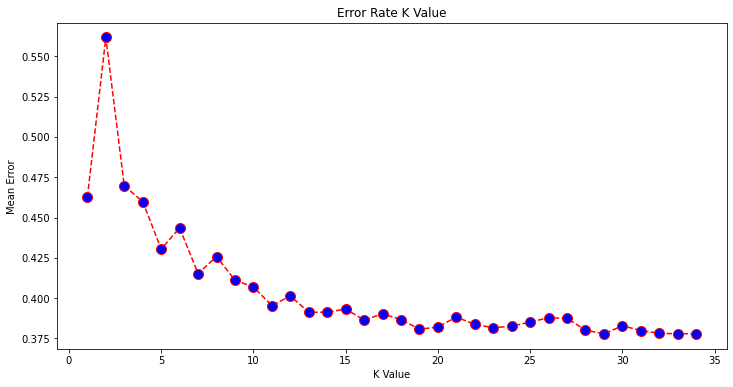

In [10]:
#find a k value for knn- look for lowest point(error) on graph

minError = 1 #where is least erorr
minErrorK = 0 #which k to choose 
errors = [0] #errors = [] 

# Calculate error for dif K values 
for i in range(1,35):#(5,35):#(1, 40)
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(descriptive_train, target_train)
    pred_i = knn.predict(descriptive_test)
    errors.append(np.mean(pred_i != target_test))
    
    #print(errors[i-1],np.mean(pred_i != target_test),minError,minErrorK)
    if(errors[i]<minError): #if(errors[i-1]<minError):
        minError=errors[i]
        minErrorK=i
        
errors=errors[1:]
print("choose k = ", minErrorK)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 35), errors, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)

plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [11]:
#K-Nearest Neighbors - predictive models

print("K-Nearest Neighbors\n")

#model = KNeighborsClassifier(n_neighbors = 32) #make modle #17 #10,50,20  

model = KNeighborsClassifier(n_neighbors = minErrorK) #make modle  #more flexible
#model = KNeighborsClassifier(n_neighbors = minErrorK,weights='distance')

model = model.fit(descriptive_train, target_train) #train
target_predict = model.predict(descriptive_test) #predict

print("target_predict===============\n")
print(target_predict)
print(target_predict.shape,"\n")


K-Nearest Neighbors

target_predict===============

[5 5 5 ... 5 5 5]
(7046,) 



In [12]:
# eval model # recall,f1 score

fscore = f1_score(target_test, target_predict, average='weighted')
print('F1score: {:f}'.format( fscore))


#precision = precision_score(target_test, target_predict, average='weighted')
#print('precision: {:f}'.format( precision))

recall = recall_score(target_test, target_predict, average='weighted')
print('recall: {:f}'.format( recall))

F1score: 0.558368
recall: 0.622197


In [13]:
#Naive Bayes - predictive models #not as good

print("Naive Bayes\n")

model = GaussianNB() #make modle
model = model.fit(descriptive_train, target_train) #train
target_predict = model.predict(descriptive_test) #predict

print("target_predict===============\n")
print(target_predict)
print(target_predict.shape,"\n")


fscore = f1_score(target_test, target_predict, average='weighted')
print('F1score: {:f}'.format( fscore))
recall = recall_score(target_test, target_predict, average='weighted')
print('recall: {:f}'.format( recall))

Naive Bayes

target_predict===============

[5 5 5 ... 5 5 5]
(7046,) 

F1score: 0.506446
recall: 0.609424


              precision    recall  f1-score   support

           1       0.60      0.20      0.30       719
           2       0.32      0.34      0.33       462
           3       0.06      0.38      0.11       152
           4       0.00      0.50      0.01        12
           5       0.99      0.69      0.81      5701

    accuracy                           0.61      7046
   macro avg       0.40      0.42      0.31      7046
weighted avg       0.88      0.61      0.71      7046

[[ 144  275  274   24    2]
 [  81  155  199   24    3]
 [  14   31   57   20   30]
 [   0    0    2    6    4]
 [   2   19  370 1378 3932]]


C:\Users\Morgan\AppData\Local\Temp/ipykernel_23456/2904237043.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Morgan\AppData\Local\Temp/ipykernel_23456/2904237043.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


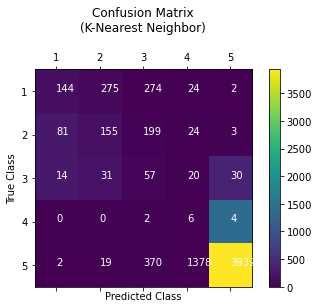

In [14]:
#visualizations 
#eg
#1,1 -> true pos of rating 1 
#5,5 -> true pos of rating 5


def draw_confusion_matrices(confusion_matrices, class_names):
    labels = list(class_names)

    for cm in confusion_matrices:
        fig = pl.figure()
        ax = fig.add_subplot(111)

        cax = ax.matshow(cm[1])
        pl.title('Confusion Matrix\n(%s)\n' % cm[0])
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        pl.xlabel('Predicted Class')
        pl.ylabel('True Class')

        for i,j in ((x,y) for x in range(len(cm[1])) for y in range(len(cm[1][0]))):
            ax.annotate(str(cm[1][i][j]), xy=(i,j), color='white')

        pl.show()
        

y= target_test
y = np.array(y)
class_names = np.unique(y)


print(classification_report(target_predict, target_test))
print(confusion_matrix(target_predict, target_test))
    

confusion_matrices = [ ("K-Nearest Neighbor", confusion_matrix(y, target_predict))]
draw_confusion_matrices(confusion_matrices, class_names)

In [15]:
'''
IN CONCLUSIONS...we get results similar to : 

F1score: 0.555832
recall: 0.619075

                  precision    recall  f1-score   support

           1       0.05      0.30      0.08        44
           2       0.27      0.36      0.31       371
           3       0.33      0.39      0.36       713
           4       0.15      0.45      0.22       506
           5       0.96      0.69      0.80      5412

    accuracy                           0.62      7046
   macro avg       0.35      0.44      0.35      7046
weighted avg       0.79      0.62      0.68      7046


 
therefore our model is about 62% accurate, F1score is 56%, and recall is 62% .

In addition:
f1 score of each target is different. 
eg: 
rating 1 with fscore= 0.08 
vs 
rating 5 with fscore= 0.80 

this is either because the data is highly imbalanced or because we are better at predicting the 5 star ratings.

'''
#cp322 project

'\nIN CONCLUSIONS...we get results similar to : \n\nF1score: 0.555832\nrecall: 0.619075\n\n                  precision    recall  f1-score   support\n\n           1       0.05      0.30      0.08        44\n           2       0.27      0.36      0.31       371\n           3       0.33      0.39      0.36       713\n           4       0.15      0.45      0.22       506\n           5       0.96      0.69      0.80      5412\n\n    accuracy                           0.62      7046\n   macro avg       0.35      0.44      0.35      7046\nweighted avg       0.79      0.62      0.68      7046\n\n\n \ntherefore our model is about 62% accurate, F1score is 56%, and recall is 62% .\n\nIn addition:\nf1 score of each target is different. \neg: \nrating 1 with fscore= 0.08 \nvs \nrating 5 with fscore= 0.80 \n\nthis is either because the data is highly imbalanced or because we are better at predicting the 5 star ratings.\n\n'